# Salary prediction based on years of experience 

in this notebook we have a small dataset that contains the salary and YearsExperience, we want to predict the salary based on YearsExperience.

## Libraries
**numpy** : for manupilation matrix and vectors <br>
**pandas** : for data processing and manupilating <br>
**sickit-learn** : for building our model <br>
**matplotlib & seaborn** : data visualizing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


## import the dataset

In [2]:
df = pd.read_csv('/kaggle/input/salary/Salary.csv')

In [3]:
df.shape
# shape of dataset

(35, 2)

In [4]:
df.isnull().sum()
# there is no null value in dataset

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [34]:
#lets see the first five rows of the dataset
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


in this dataset we have 2 columns one correspand to the years of experience and the other to the salary, in this notebook we will predict the salary based on the years of the experience

## visualize the data

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

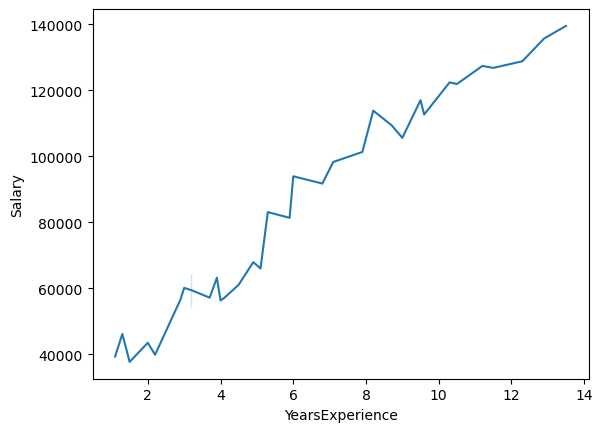

In [7]:
#visualize the pattren change
sns.lineplot(data=df,x='YearsExperience',y='Salary')

Based on this lineplot we see the that there is a correlation between the years and the salary, the more years of experience is bigger the more the salary got bigger

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

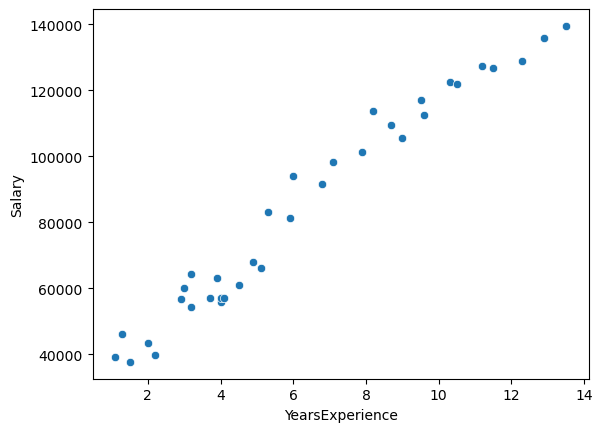

In [8]:
# let see it on a scatter plot
# visualize the relationship between the salary and yearsof experience
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

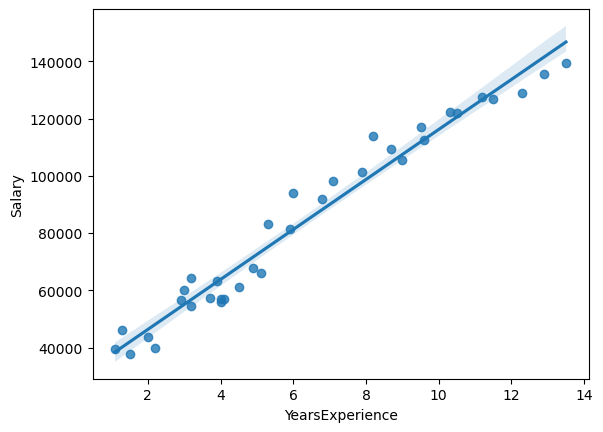

In [9]:
sns.regplot(data=df,x='YearsExperience',y='Salary')

Now we can see that there is a linear relationship between the the experience and the salary, so we can use the linear Regression to predict the salary

## spliting dataset


spliting the dataset to a training set and testing set

In [10]:
years = np.array(df['YearsExperience']).reshape(-1,1)
salary = np.array(df['Salary'])


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(years,salary,train_size=0.7,random_state=0)

## build the model

### importing the rquired libarry 

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [12]:
sgdr = SGDRegressor(max_iter=100)

In [19]:
#fit the model with the training set
sgdr.fit(x_train,y_train)

SGDRegressor(max_iter=100)

predict on testing set

In [20]:
result=sgdr.predict(x_test.reshape(-1,1))

## score and accuracy

testing the accuracy on the testing set

In [15]:
from sklearn.metrics import r2_score

In [22]:
# a metric to evaluate the model
r2_score(result,y_test)

0.9857979147515141

In [24]:
print(f"the accuracy of the model is : {sgdr.score(x_test,y_test)*100:.2f}")

the accuracy of the model is : 98.63


## plot the model

lets plot the model and see how well the model fit the data 

In [25]:
res_plot=sgdr.predict(x_train.reshape(-1,1))

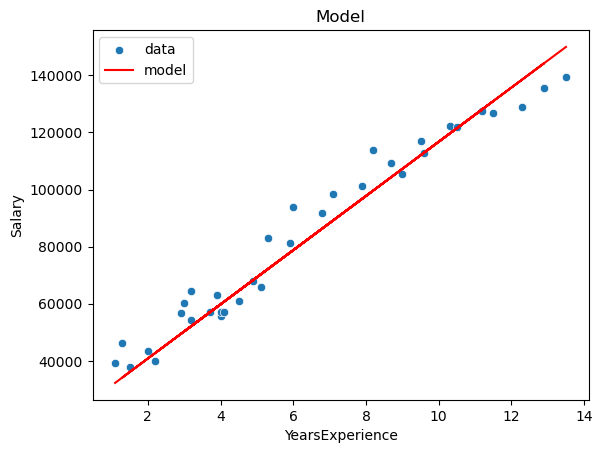

In [33]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary',label='data')
plt.plot(x_train,res_plot,'r',label='model')
plt.title('Model')
plt.legend()